In [1]:
import pandas as pd
import numpy as np

# 데이터 불러오기
data1 = pd.read_csv('WallThining_data.csv')
data2 = pd.read_csv('WallThinning_3050_data.csv')
data3 = pd.read_csv('WallThinning_10_data.csv')
data4 = pd.read_csv('WallThinning_5.csv')
data = pd.concat([data1, data2, data3, data4], axis=0)
data = data.drop('Moment', axis=1).reset_index(drop=True)
# 데이터 확인
print(data.head())

  Thining Part Moment Direction Thining Rate Boundary Type  Inner Pressure  \
0        Extra              IPO          20%    Limit Load          22.070   
1        Extra              IPO          20%    Limit Load          19.863   
2        Extra              IPO          20%    Limit Load          17.656   
3        Extra              IPO          20%    Limit Load          15.449   
4        Extra              IPO          20%    Limit Load          13.242   

   Multiplier  
0    0.754368  
1    0.889164  
2    1.000607  
3    1.022539  
4    0.970476  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 기본 정보 확인
print("데이터 기본 정보:")
data.info()

# 기술 통계 확인
print("\n기술 통계:")
print(data.describe())

# 결측치 확인
print("\n결측치 수:")
print(data.isnull().sum())

# Categorical 변수의 고유값 확인
print("\nCategorical 변수의 고유값:")
for col in ['Thining Part', 'Moment Direction', 'Boundary Type']:
    print(f"{col}: {data[col].unique()}")

데이터 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Thining Part      1518 non-null   object 
 1   Moment Direction  1518 non-null   object 
 2   Thining Rate      1518 non-null   object 
 3   Boundary Type     1518 non-null   object 
 4   Inner Pressure    1518 non-null   float64
 5   Multiplier        1518 non-null   float64
dtypes: float64(2), object(4)
memory usage: 71.3+ KB

기술 통계:
       Inner Pressure   Multiplier
count     1518.000000  1518.000000
mean        11.035000     0.667551
std          6.981447     0.160416
min          0.000000     0.244097
25%          4.414000     0.547398
50%         11.035000     0.687290
75%         17.656000     0.781328
max         22.070000     1.023181

결측치 수:
Thining Part        0
Moment Direction    0
Thining Rate        0
Boundary Type       0
Inner Pressure      0
Multiplier   

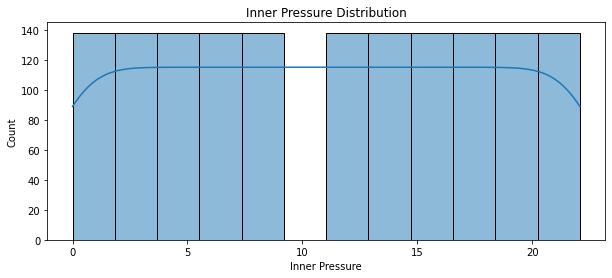

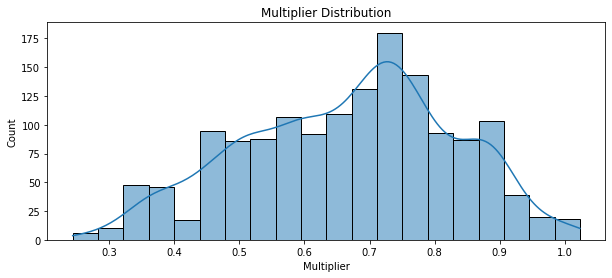

In [3]:
# Numerical 변수 분포 확인
numerical_cols = ['Inner Pressure', 'Multiplier']
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    plt.title(f"{col} Distribution")
    sns.histplot(data[col], kde=True)
    plt.show()


In [4]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaler 객체 생성
scaler = MinMaxScaler()

# 'Inner Pressure' 열 선택 및 Reshape (-1, 1) 필요 (scaler는 2D 배열을 요구함)
inner_Pressure = data['Inner Pressure'].values.reshape(-1, 1)

# Min-Max Normalization 적용
data['Inner Pressure'] = scaler.fit_transform(inner_Pressure)

# 결과 확인
print(data.head())


  Thining Part Moment Direction Thining Rate Boundary Type  Inner Pressure  \
0        Extra              IPO          20%    Limit Load             1.0   
1        Extra              IPO          20%    Limit Load             0.9   
2        Extra              IPO          20%    Limit Load             0.8   
3        Extra              IPO          20%    Limit Load             0.7   
4        Extra              IPO          20%    Limit Load             0.6   

   Multiplier  
0    0.754368  
1    0.889164  
2    1.000607  
3    1.022539  
4    0.970476  


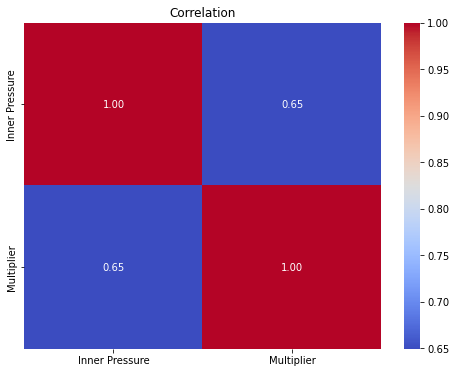

In [5]:
# 상관 관계 확인
correlation = data.corr()
plt.figure(figsize=(8, 6))
plt.title("Correlation")
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

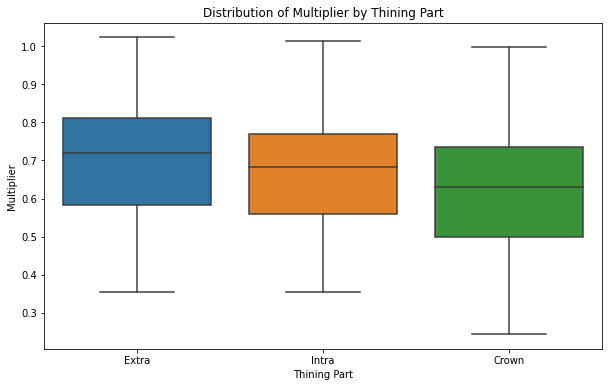

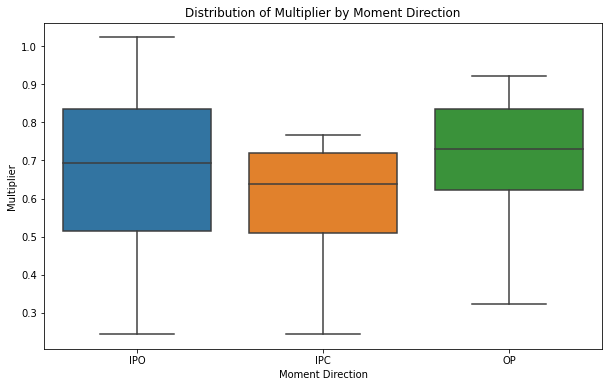

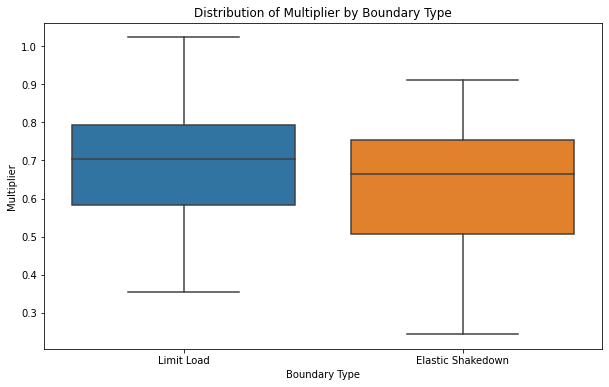

In [6]:
# Categorical 변수에 대한 Boxplot (target variable 대비)
for col in ['Thining Part', 'Moment Direction', 'Boundary Type']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='Multiplier', data=data)
    plt.title(f"Distribution of Multiplier by {col}")
    plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Categorical 변수 인코딩
# le = LabelEncoder()
# data['Thining Part'] = le.fit_transform(data['Thining Part'])
# data['Moment Direction'] = le.fit_transform(data['Moment Direction'])
# data['Boundary Type'] = le.fit_transform(data['Boundary Type'])

data = pd.get_dummies(data, columns=['Thining Part','Moment Direction','Boundary Type'])

# Numerical 변수 전처리 (Inner pressure)
data['Thining Rate'] = data['Thining Rate'].str.rstrip('%').astype('int')

# 데이터 분할
X = data.drop('Multiplier', axis=1)
y = data['Multiplier']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
import statsmodels.api as sm
X_OLS = sm.add_constant(X)

# OLS 모델 생성 및 핏팅
model = sm.OLS(y, X_OLS).fit()

# 모델 요약 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Multiplier   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     273.9
Date:                Tue, 07 May 2024   Prob (F-statistic):          4.43e-242
Time:                        06:54:34   Log-Likelihood:                 1071.7
No. Observations:                1188   AIC:                            -2127.
Df Residuals:                    1180   BIC:                            -2087.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [8]:
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'SVR': SVR()
}

# MAPE와 SMAPE 함수 정의
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred) / ((np.abs(y_true) + np.abs(y_pred)) / 2)) * 100

# 모델 학습 및 성능 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    smape = symmetric_mean_absolute_percentage_error(y_test, y_pred)
    
    print(f'{name} - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.4f}, SMAPE: {smape:.4f}')


Decision Tree Regressor - MAE: 0.0145, MSE: 0.0009, RMSE: 0.0307, MAPE: 2.3396, SMAPE: 2.3532
Random Forest Regressor - MAE: 0.0104, MSE: 0.0004, RMSE: 0.0204, MAPE: 1.6961, SMAPE: 1.6713
Gradient Boosting Regressor - MAE: 0.0164, MSE: 0.0006, RMSE: 0.0235, MAPE: 2.5638, SMAPE: 2.5522


In [10]:
data_10 = data[data['Thining Rate'] == 10]
X_test = data_10.drop('Multiplier', axis=1)
y_test = data_10['Multiplier']


# 모델 컴파일 및 학습
for name, model in models.items():
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    smape = symmetric_mean_absolute_percentage_error(y_test, y_pred)
    print(name, f'{mape:.4f}')
    # print(f'{name} - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.4f}, SMAPE: {smape:.4f}')


Linear Regression 12.0149
Decision Tree Regressor 0.1913
Random Forest Regressor 0.4343
Gradient Boosting Regressor 1.8823
Ridge Regression 12.0799
Lasso Regression 22.4536
SVR 17.6259


In [11]:
data_60 = data[data['Thining Rate'] == 60]
X_test = data_60.drop('Multiplier', axis=1)
y_test = data_60['Multiplier']


# 모델 컴파일 및 학습
for name, model in models.items():
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    smape = symmetric_mean_absolute_percentage_error(y_test, y_pred)
    print(name, f'{mape:.4f}')
    # print(f'{name} - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.4f}, SMAPE: {smape:.4f}')


Linear Regression 15.7862
Decision Tree Regressor 0.9643
Random Forest Regressor 1.7916
Gradient Boosting Regressor 3.0799
Ridge Regression 15.7707
Lasso Regression 25.8429
SVR 17.5032


In [20]:
import pandas as pd
import numpy as np

# 데이터 불러오기
data = pd.read_csv('WallThinning_10_data.csv')
data = data.drop('Moment', axis=1)
# 데이터 확인
print(data.head())

  Thining Part Moment Direction Thining Rate      Boundary Type  \
0        Intra              IPO          10%  Elastic Shakedown   
1        Intra              IPO          10%  Elastic Shakedown   
2        Intra              IPO          10%  Elastic Shakedown   
3        Intra              IPO          10%  Elastic Shakedown   
4        Intra              IPO          10%  Elastic Shakedown   

   Inner Pressure  Multiplier  
0           0.000    0.358500  
1           2.207    0.398348  
2           4.414    0.448171  
3           6.621    0.512240  
4           8.828    0.597668  


In [21]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaler 객체 생성
scaler = MinMaxScaler()

# 'Inner Pressure' 열 선택 및 Reshape (-1, 1) 필요 (scaler는 2D 배열을 요구함)
inner_Pressure = data['Inner Pressure'].values.reshape(-1, 1)

# Min-Max Normalization 적용
data['Inner Pressure'] = scaler.fit_transform(inner_Pressure)

# 결과 확인
print(data.head())


  Thining Part Moment Direction Thining Rate      Boundary Type  \
0        Intra              IPO          10%  Elastic Shakedown   
1        Intra              IPO          10%  Elastic Shakedown   
2        Intra              IPO          10%  Elastic Shakedown   
3        Intra              IPO          10%  Elastic Shakedown   
4        Intra              IPO          10%  Elastic Shakedown   

   Inner Pressure  Multiplier  
0             0.0    0.358500  
1             0.1    0.398348  
2             0.2    0.448171  
3             0.3    0.512240  
4             0.4    0.597668  


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

data = pd.get_dummies(data, columns=['Thining Part','Moment Direction','Boundary Type'])

# Numerical 변수 전처리 (Inner pressure)
data['Thining Rate'] = data['Thining Rate'].str.rstrip('%').astype('int')

# 데이터 분할
X = data.drop('Multiplier', axis=1)
y = data['Multiplier']

In [23]:
# 모델 컴파일 및 학습
for name, model in models.items():
    y_pred = model.predict(X)

    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y, y_pred)
    smape = symmetric_mean_absolute_percentage_error(y, y_pred)   
    r2 = r2_score(y, y_pred)

    print(f'{name} - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.4f}, SMAPE: {smape:.4f}, R2: {r2:.4f}')

Linear Regression - MAE: 0.0815, MSE: 0.0099, RMSE: 0.0995, MAPE: 12.8914, SMAPE: 12.1084, R2: 0.6288
Decision Tree Regressor - MAE: 0.0118, MSE: 0.0003, RMSE: 0.0177, MAPE: 1.7301, SMAPE: 1.7657, R2: 0.9882
Random Forest Regressor - MAE: 0.0139, MSE: 0.0004, RMSE: 0.0202, MAPE: 1.9968, SMAPE: 2.0409, R2: 0.9847
Gradient Boosting Regressor - MAE: 0.0207, MSE: 0.0007, RMSE: 0.0263, MAPE: 3.0420, SMAPE: 3.1041, R2: 0.9740
Ridge Regression - MAE: 0.0818, MSE: 0.0099, RMSE: 0.0997, MAPE: 12.9601, SMAPE: 12.1651, R2: 0.6268
Lasso Regression - MAE: 0.1459, MSE: 0.0288, RMSE: 0.1696, MAPE: 22.5010, SMAPE: 21.7837, R2: -0.0798
SVR - MAE: 0.1130, MSE: 0.0192, RMSE: 0.1384, MAPE: 19.0825, SMAPE: 17.1009, R2: 0.2812
